<h1>Exploring and Visualizing Culture Homework

### Topic: Average Ratings by Language and Genres

## Import Data

I imported necessary libraries and read the data. 

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt

df = pd.read_csv("https://raw.githubusercontent.com/melaniewalsh/responsible-datasets-in-context/main/datasets/top-500-novels/library_top_500.csv", sep=',', header=0, low_memory=False)
df

,top_500_rank,title,author,pub_year,orig_lang,genre,author_birth,author_death,author_gender,author_primary_lang,...,gr_num_ratings,gr_num_reviews,gr_avg_rating_rank,gr_num_ratings_rank,oclc_owi,author_viaf,gr_url,wiki_url,pg_eng_url,pg_orig_url
0,1,Don Quixote,Miguel de Cervantes,1605,Spanish,action,1547,1616,male,spa,...,"269,435","12,053",318,211,1.810748e+09,17220427,https://www.goodreads.com/book/show/3836.Don_Q...,https://en.wikipedia.org/wiki/Don_Quixote,https://www.gutenberg.org/cache/epub/996/pg996...,https://www.gutenberg.org/cache/epub/2000/pg20...
1,2,Alice's Adventures in Wonderland,Lewis Carroll,1865,English,fantasy,1832,1898,male,eng,...,"561,016","15,380",172,133,1.156132e+10,66462036,https://www.goodreads.com/book/show/24213.Alic...,https://en.wikipedia.org/wiki/Alice%27s_Advent...,https://www.gutenberg.org/cache/epub/11/pg11.txt,NaN
2,3,The Adventures of Huckleberry Finn,Mark Twain,1884,English,action,1835,1910,male,eng,...,"1,262,480","19,440",373,68,3.373178e+09,50566653,https://www.goodreads.com/book/show/2956.The_A...,https://en.wikipedia.org/wiki/Adventures_of_Hu...,https://www.gutenberg.org/cache/epub/76/pg76.txt,NaN
3,4,The Adventures of Tom Sawyer,Mark Twain,1876,English,action,1835,1910,male,eng,...,"931,898","13,603",301,88,3.373178e+09,50566653,https://www.goodreads.com/book/show/24583.The_...,https://en.wikipedia.org/wiki/The_Adventures_o...,https://www.gutenberg.org/cache/epub/74/pg74.txt,NaN
4,5,Treasure Island,Robert Louis Stevenson,1883,English,action,1850,1894,male,eng,...,"486,155","16,307",368,145,3.434000e+03,95207986,https://www.goodreads.com/book/show/295.Treasu...,https://en.wikipedia.org/wiki/Treasure_Island,https://www.gutenberg.org/cache/epub/120/pg120...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,Stranger in a Strange Land,Robert A. Heinlein,1961,English,scifi,1907,1988,male,eng,...,"311,859","9,961",310,190,7.894120e+05,12309757,NaN,https://en.wikipedia.org/wiki/Stranger_in_a_St...,NA_not-pub-domain,NaN
496,497,Vision in White,Nora Roberts,2009,English,romance,1965,ALIVE,female,eng,...,"138,445","4,652",128,277,1.559638e+08,66448023,NaN,https://en.wikipedia.org/wiki/Vision_in_White,NA_not-pub-domain,NaN
497,498,The Whipping Boy,Sid Fleischman,1986,English,action,1920,2010,male,eng,...,"27,444","1,623",476,445,4.415520e+08,66438084,NaN,https://en.wikipedia.org/wiki/The_Whipping_Boy,NA_not-pub-domain,NaN
498,499,Room,Emma Donoghue,2010,English,na,1969,ALIVE,female,eng,...,"801,989","50,594",171,101,4.859780e+08,39539889,NaN,https://en.wikipedia.org/wiki/Room_(novel),NA_not-pub-domain,NaN


## Exploratory Data Analysis (EDA) with Pandas

Here, I start exploratory data analysis (EDA) to understand the dataset better. I start by summarizing the dataset's statistics, examining data types, and then calculating and visualizing the correlation matrix for numerical variables. I also examine the counts of unique values in the orig_lang, genre, and gr_avg_rating columns, which will be related to my visualization later to observe the trends and potenital insights within these three variables. 

In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
top_500_rank,500.0,2.505000e+02,1.444818e+02,1.00,125.75,250.50,3.752500e+02,5.000000e+02
pub_year,500.0,1.932132e+03,8.430655e+01,1021.00,1900.00,1948.00,1.989000e+03,2.015000e+03
oclc_holdings,495.0,1.040144e+04,5.694509e+03,996.00,6800.00,8318.00,1.218400e+04,3.770200e+04
oclc_eholdings,495.0,2.218594e+03,3.084596e+03,25.00,352.00,558.00,3.223000e+03,1.554500e+04
oclc_total_editions,495.0,8.966424e+02,1.019016e+03,21.00,241.00,485.00,1.207500e+03,9.017000e+03
oclc_holdings_rank,495.0,2.480000e+02,1.430385e+02,1.00,124.50,248.00,3.715000e+02,4.950000e+02
oclc_editions_rank,495.0,2.480000e+02,1.430385e+02,1.00,124.50,248.00,3.715000e+02,4.950000e+02
gr_avg_rating,500.0,3.971440e+00,2.276875e-01,3.29,3.83,3.98,4.120000e+00,4.620000e+00
gr_avg_rating_rank,500.0,2.505000e+02,1.444818e+02,1.00,125.75,250.50,3.752500e+02,5.000000e+02
gr_num_ratings_rank,500.0,2.505000e+02,1.444818e+02,1.00,125.75,250.50,3.752500e+02,5.000000e+02


In [36]:
df.dtypes

top_500_rank                  int64
title                        object
author                       object
pub_year                      int64
orig_lang                    object
genre                        object
author_birth                 object
author_death                 object
author_gender                object
author_primary_lang          object
author_nationality           object
author_field_of_activity     object
author_occupation            object
oclc_holdings               float64
oclc_eholdings              float64
oclc_total_editions         float64
oclc_holdings_rank          float64
oclc_editions_rank          float64
gr_avg_rating               float64
gr_num_ratings               object
gr_num_reviews               object
gr_avg_rating_rank            int64
gr_num_ratings_rank           int64
oclc_owi                    float64
author_viaf                  object
gr_url                       object
wiki_url                     object
pg_eng_url                  

In [37]:
orig_lang_counts = df["orig_lang"].value_counts()
print(orig_lang_counts)
genre_counts = df["genre"].value_counts()
print(genre_counts)
rating_counts = df["gr_avg_rating"].value_counts()
print(rating_counts)

orig_lang
English       430
French         25
German         14
Russian        11
Spanish         7
Italian         5
Swedish         3
Latin           1
Japanese        1
Portuguese      1
Chinese         1
Polish          1
Name: count, dtype: int64
genre
na            221
history        53
fantasy        48
romance        33
bildung        27
scifi          21
thrillers      21
mystery        18
action         16
political      15
horror          8
autobio         8
allegories      7
war             4
Name: count, dtype: int64
gr_avg_rating
3.99    13
4.09    13
3.94    13
3.96    13
4.02    13
        ..
3.45     1
4.30     1
4.32     1
4.56     1
3.31     1
Name: count, Length: 106, dtype: int64


In [38]:
average_rating_language = df.groupby('orig_lang')['gr_avg_rating'].mean().reset_index()
average_rating_language

,orig_lang,gr_avg_rating
0,Chinese,4.210000
1,English,3.969000
2,French,3.952800
3,German,3.949286
4,Italian,3.946000
5,Japanese,3.720000
6,Latin,3.550000
7,Polish,4.010000
8,Portuguese,3.910000
9,Russian,4.106364


## Exploratory Data Analysis (EDA) with Altair and seaborn

With both of the histogram and linechart, we can visualize the distribution of publication years in our dataset using Seaborn's histplot and altair. This will help us understand the frequency of book publications over different years. From the two visualizations below, we can know that we are analyzing the books that are mostly published around 2000. 

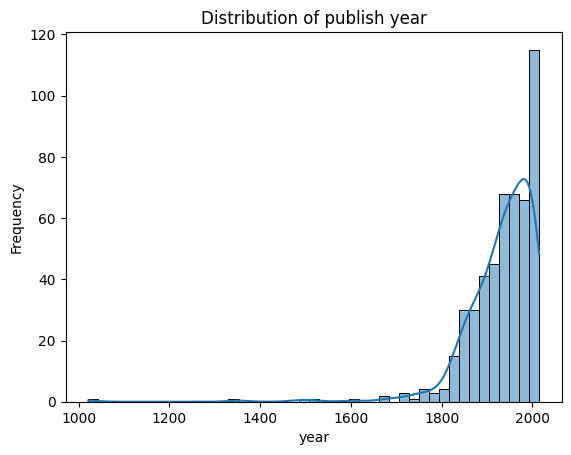

In [39]:
sns.histplot(df["pub_year"], kde=True)
plt.title("Distribution of publish year")
plt.xlabel("year")
plt.ylabel("Frequency")
plt.show()

In [40]:
df['pub_year'] = pd.to_numeric(df['pub_year'], errors='coerce')

books_per_year = df.groupby('pub_year').size().reset_index(name='count')

chart = alt.Chart(books_per_year).mark_line(point=True).encode(
    x=alt.X('pub_year:Q', title='Publication Year'),
    y=alt.Y('count:Q', title='Number of Books Published'),
    tooltip=['pub_year', 'count']
).properties(
    width=500,
    height=400,
    title='Number of Books Published Over Time'
)

chart

alt.Chart(...)

In [41]:
# use the statistics result from panda to create graph
# Sort the DataFrame by average rating
average_rating_language_sorted = average_rating_language.sort_values('gr_avg_rating', ascending=True)
# Create the bar chart
chart = alt.Chart(average_rating_language_sorted).mark_bar().encode(
    x=alt.X('gr_avg_rating:Q', title='Average Rating', scale=alt.Scale(domain=(0, 4.5))),
    y=alt.Y('orig_lang:N', sort='-x', title='Original Language'),
    color=alt.Color('gr_avg_rating:Q', scale=alt.Scale(scheme='viridis'), legend=None),
    tooltip=[
        alt.Tooltip('orig_lang:N', title='Original Language'),
        alt.Tooltip('gr_avg_rating:Q', format='.2f', title='Average Rating')
    ]
).properties(
    width=500,
    height=400,
    title='Average Rating by Original Language'
)
chart


alt.Chart(...)

In [42]:
chart = alt.Chart(df).mark_circle(size=100).encode(
    x=alt.X('gr_avg_rating', title='Average Rating'),
    y=alt.Y('orig_lang', title='Original Language'),
    color=alt.Color('genre', title='Genre'),
    tooltip=['orig_lang', 'gr_avg_rating', 'genre']
).properties(
    width=750, 
    title='Average Ratings by Original Language and Genre'
)
chart


alt.Chart(...)

### Conclusion

From all of the visualization, we can see that high ratings across multiple languages in books published around 2000. Books in English, German, and French, tend to have higher average ratings, with many clustered above a 4.0 rating. This suggests that books in these languages are generally well-received by readers. Genres such as fantasy, romance, and history appear to be the higher-rated books. However, books in Latin, Polish, and Portuguese seem to have fewer data points and a wider range of ratings, which suggests that they have less audience or varied reception for books in these languages.